<center>
    
# Python User Group
# Tutorial

</center>
<img src="python.jpg" width="100"/> <img src="logo.png" width="150"/>

## Presenter: Michael Hemming

# Topic: The effect of bushfires: exploring the data


 # Introduction

<font size="4">

The air quality in Australia was amongst the worst in the world at times during the bushfire crisis that raged through large swathes of eastern states in December and January. 

<font size="2">
    
## Air Quality Index (AQI)

<br/>

<font size="4">
    
Think of the AQI as a yardstick that runs from 0 to 500. The higher the AQI value, the greater the level of air pollution and the greater the health concern. For example, an AQI value of 50 represents good air quality with little potential to affect public health, while an AQI value over 300 represents hazardous air quality.

An individual score (Individual Air Quality Index, IAQI) is assigned to each pollutant (O3, NO2, visibility, CO, SO2, PM10, PM2.5) and the final AQI is the highest of these scores. 

An AQI value of 100 generally corresponds to the national air quality standard for the pollutant, which is the level EPA has set to protect public health. AQI values below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is considered to be unhealthy-at first for certain sensitive groups of people, then for everyone as AQI values get higher. See https://airnow.gov/index.cfm?action=aqibasics.aqi

<br/>
<br/>

<img src="AQI.png" />


# Outline of tutorial:

<font size="4">
<br>

* Looking at AQI at a range of sites in NSW between 1994 - 2020 (not all sites have this range)
<br>
* Using pandas (loading data as dataframes, index selection), numpy (stats, NaN filling), matplotlib (plot and histogram visualisation)
<br>
* datetime, years, months, days
<br>
* Time binning -> daily climatologies, annual means
<br>
* Use moving average function
<br>
* displaying combination of string and numerical information

# Packages:

<br>
<br>

In [1]:
# for loading data and calculations
import pandas as pd
import numpy as np
# for plotting timeseries and histogram
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# To create time variables
from datetime import datetime, timedelta
# from scipy import signal

# Load in data:

<font size="4">

Data accessed here: https://www.dpie.nsw.gov.au/air-quality/search-for-and-download-air-quality-data

In [2]:
# Load in AQI daily averaged data
AQI = pd.read_csv('/Users/Michael/Documents/Work/UNSW/Python/PUG_02032020/AQIndex.csv')
#-----------------------------------------------------------------------------
# select series from dataframe
Date = AQI["Date"] # can use .to_datetime
SYD_CE = AQI["Sydney central-east RAQI 24 hour [index]"]
SYD_NW = AQI["Sydney north-west RAQI 24 hour [index]"]
SYD_SW = AQI["Sydney south-west RAQI 24 hour [index]"]
ILL = AQI["Illawarra RAQI 24 hour [index]"]
LHUNT = AQI["Lower Hunter RAQI 24 hour [index]"]
CCOAST = AQI["Central Coast RAQI 24 hour [index]"]
NCASTLE = AQI["Newcastle local RAQI 24 hour [index]"]
PORTMAC = AQI["Emergency Monitoring - Port Macquarie RAQI 24 hour [index]"]
COFFS = AQI["Emergency Monitoring - Coffs Harbour RAQI 24 hour [index]"]
#-----------------------------------------------------------------------------
# Create datetime for plotting
start_date = datetime(1994,1,1)
start_date_yr = start_date.year
#-----------------------------------------------------------------------------
# get datetimes as variable 'Date' is a series of strings (x label would not adapt to limits)
# timedelta = 1 day, 9553 days between 01/01/1994 and 26/02/2020
time = [start_date + timedelta(days=x) for x in range(9553)] 

In [3]:
AQI

,Date,Sydney central-east RAQI 24 hour [index],Sydney north-west RAQI 24 hour [index],Sydney south-west RAQI 24 hour [index],Illawarra RAQI 24 hour [index],Lower Hunter RAQI 24 hour [index],Central Coast RAQI 24 hour [index],Newcastle local RAQI 24 hour [index],Emergency Monitoring - Port Macquarie RAQI 24 hour [index],Emergency Monitoring - Coffs Harbour RAQI 24 hour [index]
0,01/01/1994,45.0,73.0,70.0,57.0,53.0,NaN,NaN,NaN,NaN
1,02/01/1994,41.0,59.0,63.0,59.0,91.0,NaN,NaN,NaN,NaN
2,03/01/1994,40.0,57.0,61.0,51.0,208.0,NaN,NaN,NaN,NaN
3,04/01/1994,27.0,36.0,32.0,38.0,145.0,NaN,NaN,NaN,NaN
4,05/01/1994,37.0,47.0,50.0,100.0,171.0,NaN,NaN,NaN,NaN
5,06/01/1994,43.0,62.0,62.0,32.0,156.0,NaN,NaN,NaN,NaN
6,07/01/1994,64.0,485.0,445.0,227.0,193.0,NaN,NaN,NaN,NaN
7,08/01/1994,84.0,470.0,82.0,43.0,179.0,NaN,NaN,NaN,NaN
8,09/01/1994,31.0,488.0,97.0,27.0,480.0,NaN,NaN,NaN,NaN
9,10/01/1994,18.0,244.0,147.0,35.0,50.0,NaN,NaN,NaN,NaN


In [4]:
SYD_CE

0        45.0
1        41.0
2        40.0
3        27.0
4        37.0
5        43.0
6        64.0
7        84.0
8        31.0
9        18.0
10      150.0
11      138.0
12      263.0
13       87.0
14       16.0
15       25.0
16       57.0
17       83.0
18       27.0
19       24.0
20       39.0
21       16.0
22       25.0
23       22.0
24       23.0
25       14.0
26       25.0
27       14.0
28       28.0
29       19.0
        ...  
9523     73.0
9524     89.0
9525     66.0
9526     75.0
9527    123.0
9528    143.0
9529    119.0
9530     75.0
9531     35.0
9532     33.0
9533     47.0
9534     55.0
9535     85.0
9536     53.0
9537     79.0
9538     41.0
9539     52.0
9540     48.0
9541     50.0
9542     39.0
9543     29.0
9544     71.0
9545     48.0
9546     40.0
9547     48.0
9548     34.0
9549     34.0
9550     43.0
9551     47.0
9552      NaN
Name: Sydney central-east RAQI 24 hour [index], Length: 9553, dtype: float64

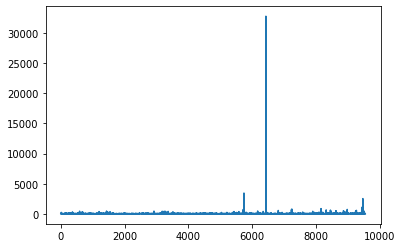

In [5]:
plt.plot(SYD_CE)

In [6]:
# Some subjective QC (change unrealistic values > 10000 to NaN)
SYD_CE[SYD_CE > 10000] = np.nan

/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
## Obtain year, month, day, day of year information (like datevec in MATLAB)
#-----------------------------------------------------------------------------
year = []
month = []
day = []
# extract year, month, day, for each timestep in variable 'time'
for x in range(0,len(time)):
    year.append(time[x].year)
    month.append(time[x].month)
    day.append(time[x].day)
#-----------------------------------------------------------------------------
day_of_year_datetime = []   
day_of_year = []
# get day of year (datetime)
# use 2020 as is leap year so does not get an error when day = 29 (Feb 29)
for x in range(0,len(time)):
    a = day[x]
    day_of_year_datetime.append(datetime(2020,month[x],day[x]))
#-----------------------------------------------------------------------------    
# get day of the year (list)
a = []
tt = []
for x in range(0,len(time)):
    a = day_of_year_datetime[x]
    tt = a.timetuple()
    day_of_year.append(tt.tm_yday)

# removing unwanted variables
del a, tt, x

## Plotting the data

<font size="4">
    
Plotting AQI at various sites:

In [8]:
# Set plot font here to be called as kwarg later
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 30}
# more info, see https://pythontips.com/2013/08/04/args-and-kwargs-in-python-explained/ 

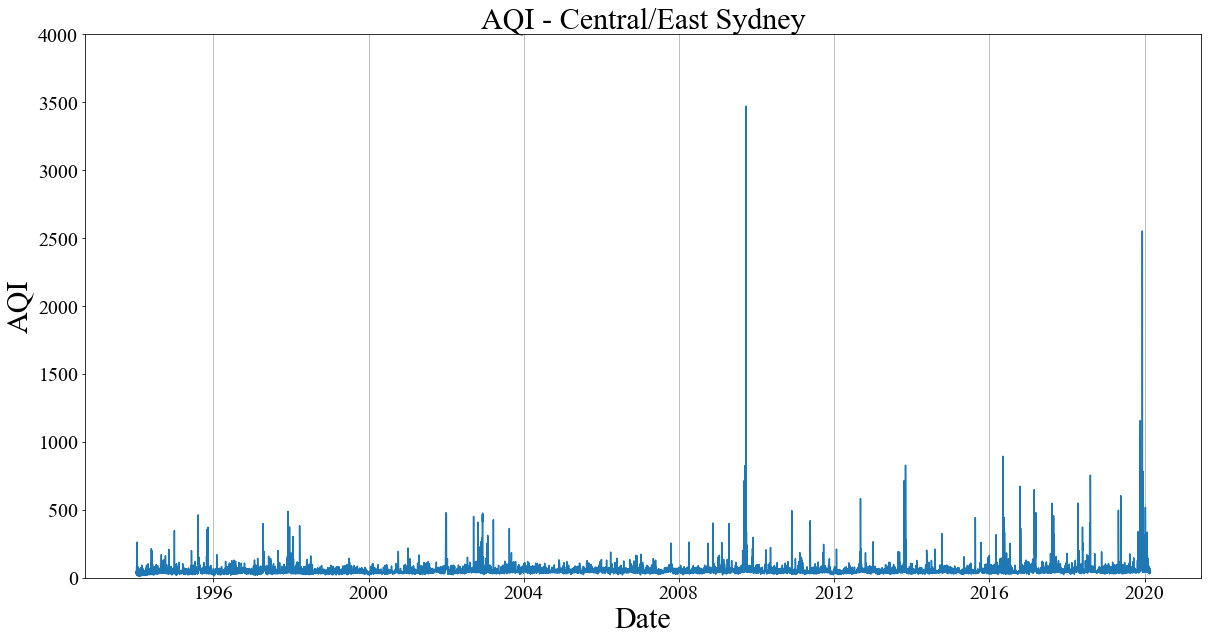

In [13]:
%matplotlib inline
# %matplotlib qt
# %matplotlib notebook

fig= plt.figure(figsize=(20,10))
plt.plot(time,SYD_CE)
plt.rc('font', **font)
plt.xlabel('Date',fontsize=30)
plt.ylabel('AQI',fontsize=30)
plt.title('AQI - Central/East Sydney',fontsize=30)
axes = plt.gca()
axes.set_ylim([0,4000])
axes.grid(axis='x')
axes.tick_params(axis="x", labelsize=20)
axes.tick_params(axis="y", labelsize=20)
plt.rc('font', **font)

# removing unwanted variables
del fig, axes 

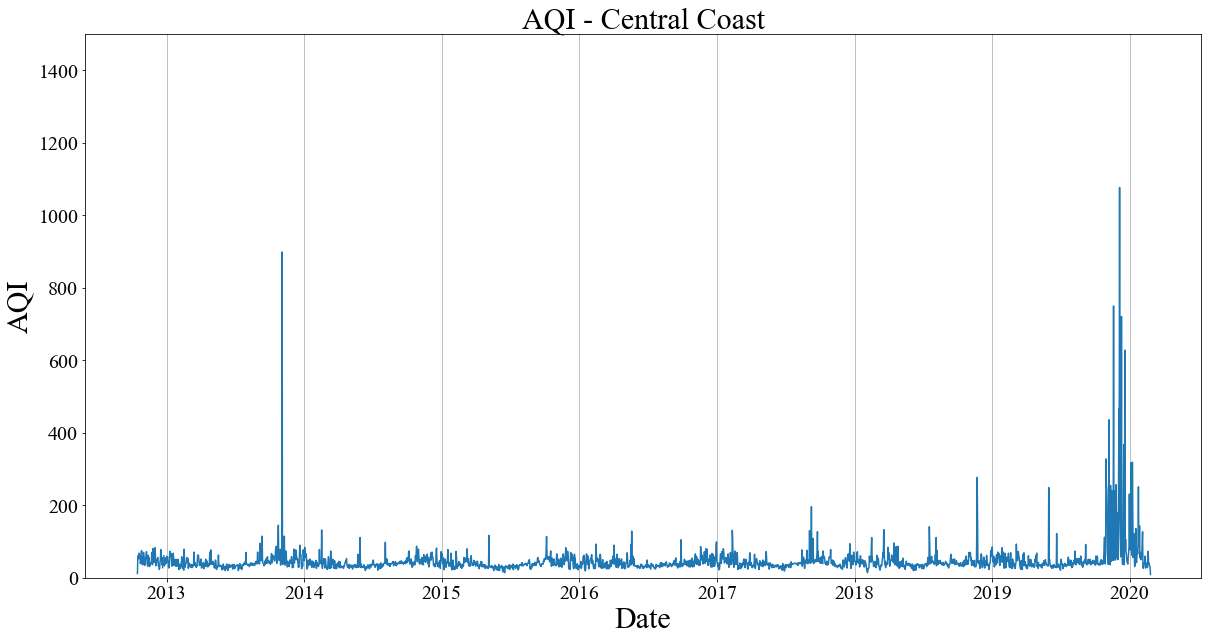

In [14]:
%matplotlib inline
# %matplotlib qt

fig= plt.figure(figsize=(20,10))
plt.plot(time,CCOAST)
plt.xlabel('Date',fontsize=30)
plt.ylabel('AQI',fontsize=30)
plt.title('AQI - Central Coast',fontsize=30)
axes = plt.gca()
axes.set_ylim([0,1500])
axes.grid(axis='x')
axes.tick_params(axis="x", labelsize=20)
axes.tick_params(axis="y", labelsize=20)
plt.rc('font', **font)

# removing unwanted variables
del fig, axes 

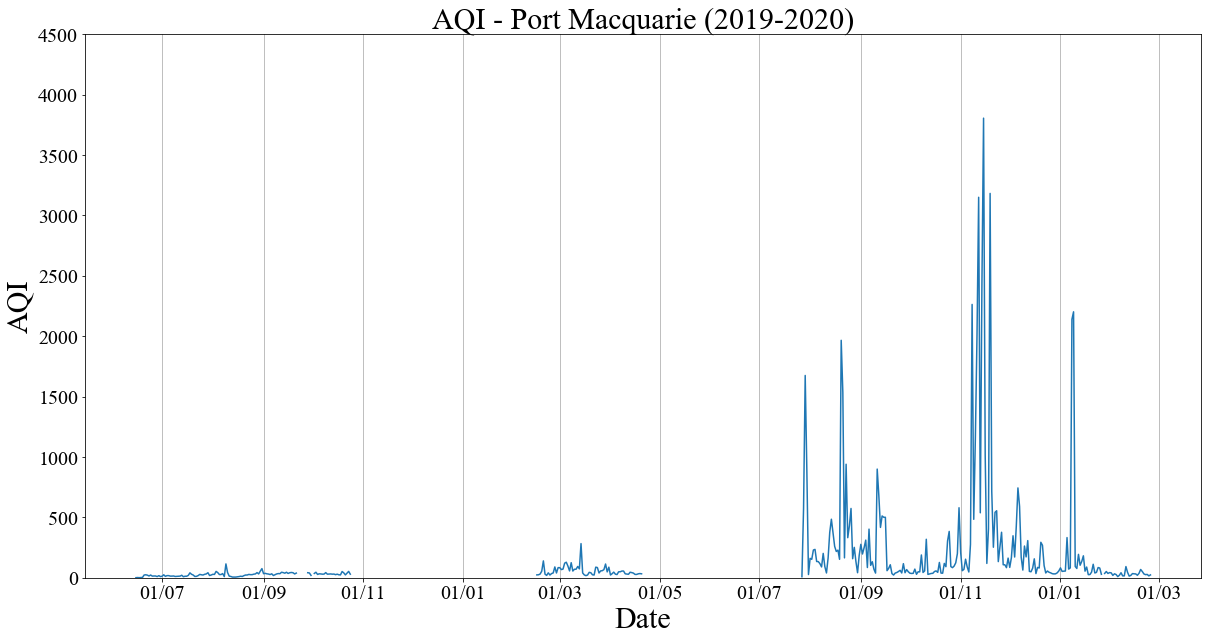

In [15]:
%matplotlib inline
# %matplotlib qt

fig= plt.figure(figsize=(20,10))
plt.plot(time,PORTMAC)
plt.xlabel('Date',fontsize=30)
plt.ylabel('AQI',fontsize=30)
plt.title('AQI - Port Macquarie (2019-2020)',fontsize=30)
axes = plt.gca()
axes.set_ylim([0,4500])
axes.grid(axis='x')
axes.tick_params(axis="x", labelsize=20)
axes.tick_params(axis="y", labelsize=20)
date_formatter = mdates.DateFormatter('%d/%m')
axes.xaxis.set_major_formatter(date_formatter)
plt.rc('font', **font)

# removing unwanted variables
del fig, axes, date_formatter

<font size="4">
    
binning the data to get simplistic daily climatologies:

In [19]:
# binning the data to get simplistic daily climatologies
#-----------------------------------------------------------------------------
# get daily climatology

# groupby might be better!

data_available_SYD_CE = []
data_available_SYD_NW = []
data_available_SYD_SW = []
data_available_ILL = []
data_available_LHUNT = []
data_available_CCOAST = []
data_available_NCASTLE = []
data_available_PORTMAC = []
data_available_COFFS = []

daily_clim_SYD_CE = []
daily_clim_SYD_NW = []
daily_clim_SYD_SW = []
daily_clim_ILL = []
daily_clim_LHUNT = []
daily_clim_CCOAST = []
daily_clim_NCASTLE = []
daily_clim_PORTMAC = []
daily_clim_COFFS = []

#-----------------------------------------------------------------------------
# Needs to be pandas dataframe for easier boolean indexing
# convert from series to dataframe
day_of_year_pd = pd.DataFrame({'col':day_of_year})
SYD_CE_pd = pd.DataFrame({'col':SYD_CE})
SYD_NW_pd = pd.DataFrame({'col':SYD_NW})
SYD_SW_pd = pd.DataFrame({'col':SYD_SW})
ILL_pd = pd.DataFrame({'col':ILL})
LHUNT_pd = pd.DataFrame({'col':LHUNT})
CCOAST_pd = pd.DataFrame({'col':CCOAST})
NCASTLE_pd = pd.DataFrame({'col':NCASTLE})
PORTMAC_pd = pd.DataFrame({'col':PORTMAC})
COFFS_pd = pd.DataFrame({'col':COFFS})
#-----------------------------------------------------------------------------
for n_doy in range(0,365):
    # Select data available for each day of the year
    data_available_SYD_CE.append(SYD_CE_pd[day_of_year_pd == n_doy+1])
    data_available_SYD_NW.append(SYD_NW_pd[day_of_year_pd == n_doy+1])
    data_available_SYD_SW.append(SYD_SW_pd[day_of_year_pd == n_doy+1])
    data_available_ILL.append(ILL_pd[day_of_year_pd == n_doy+1])
    data_available_LHUNT.append(LHUNT_pd[day_of_year_pd == n_doy+1])
    data_available_CCOAST.append(CCOAST_pd[day_of_year_pd == n_doy+1])
    data_available_NCASTLE.append(NCASTLE_pd[day_of_year_pd == n_doy+1])
    data_available_PORTMAC.append(PORTMAC_pd[day_of_year_pd == n_doy+1])
    data_available_COFFS.append(COFFS_pd[day_of_year_pd == n_doy+1])
    # get mean for each day of the year
    daily_clim_SYD_CE.append(np.nanmean(data_available_SYD_CE[n_doy]))
    daily_clim_SYD_NW.append(np.nanmean(data_available_SYD_NW[n_doy]))
    daily_clim_SYD_SW.append(np.nanmean(data_available_SYD_SW[n_doy]))
    daily_clim_ILL.append(np.nanmean(data_available_ILL[n_doy]))
    daily_clim_LHUNT.append(np.nanmean(data_available_LHUNT[n_doy]))
    daily_clim_CCOAST.append(np.nanmean(data_available_CCOAST[n_doy]))
    daily_clim_NCASTLE.append(np.nanmean(data_available_NCASTLE[n_doy]))
    daily_clim_PORTMAC.append(np.nanmean(data_available_PORTMAC[n_doy]))
    daily_clim_COFFS.append(np.nanmean(data_available_COFFS[n_doy]))
#-----------------------------------------------------------------------------
# removing unwanted variables
del n_doy

/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice


In [17]:
# daily climatologies are noisy, so use moving average
# uses convolution with equal weighting
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

<font size="4">
    
Plotting AQI Daily moving averaged climatologies at various sites:

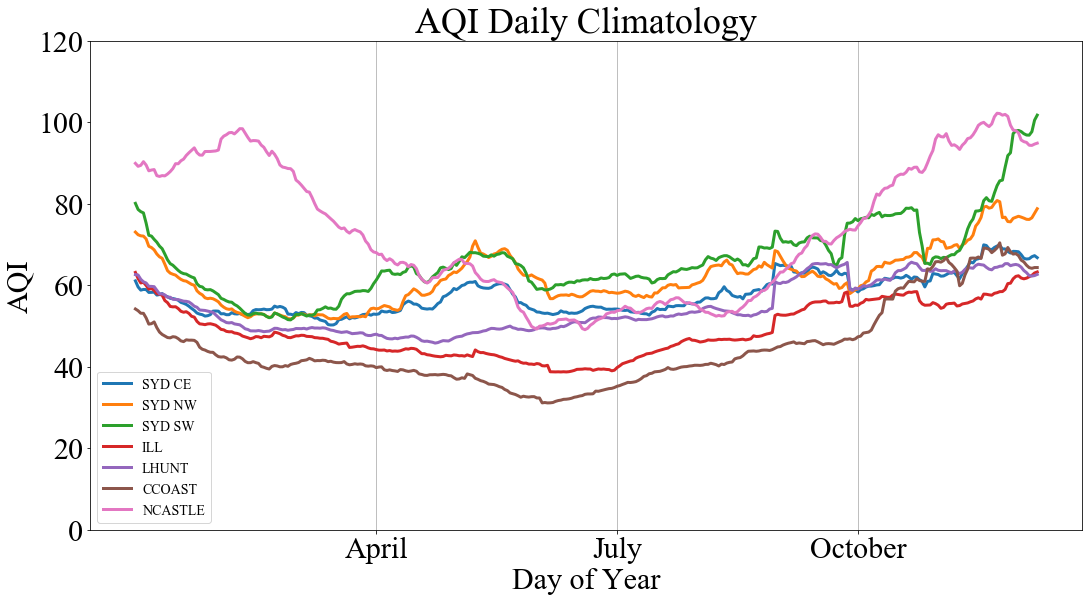

In [18]:
%matplotlib inline
# %matplotlib qt

fig= plt.figure(figsize=(20,10))

plt.plot(movingaverage(daily_clim_SYD_CE,28),label='SYD CE',linewidth=3)
plt.plot(movingaverage(daily_clim_SYD_NW,28),label='SYD NW',linewidth=3)
plt.plot(movingaverage(daily_clim_SYD_SW,28),label='SYD SW',linewidth=3)
plt.plot(movingaverage(daily_clim_ILL,28),label='ILL',linewidth=3)
plt.plot(movingaverage(daily_clim_LHUNT,28),label='LHUNT',linewidth=3)
plt.plot(movingaverage(daily_clim_CCOAST,28),label='CCOAST',linewidth=3)
plt.plot(movingaverage(daily_clim_NCASTLE,28),label='NCASTLE',linewidth=3)
# PORTMAC & COFFS not plotted because not enough data
# plt.plot(movingaverage(daily_clim_PORTMAC,28))
# plt.plot(movingaverage(daily_clim_COFFS,28))
plt.legend(loc='lower left',fontsize=14)
plt.xlabel('Day of Year')
plt.ylabel('AQI')
plt.title('AQI Daily Climatology')
axes = plt.gca()
axes.set_ylim([0,120])
axes.grid(axis='x')
plt.rc('font', **font)
axes.set_xticks([90,180,270])
axes.set_xticklabels(['April','July','October'])
plt.show()

# removing unwanted variables
del fig, axes,

<font size="4">
    
Binning the data to get annual means:

In [20]:
# binning the data to get annual means
#-----------------------------------------------------------------------------

data_available_SYD_CE = []
data_available_SYD_NW = []
data_available_SYD_SW = []
data_available_ILL = []
data_available_LHUNT = []
data_available_CCOAST = []
data_available_NCASTLE = []
data_available_PORTMAC = []
data_available_COFFS = []

annual_SYD_CE = []
annual_SYD_NW = []
annual_SYD_SW = []
annual_ILL = []
annual_LHUNT = []
annual_CCOAST = []
annual_NCASTLE = []
annual_PORTMAC = []
annual_COFFS = []

year_pd = pd.DataFrame({'col':year})
#-----------------------------------------------------------------------------
for n_year in range(1994,2020):
    # Select data available for each year between 1994 and 2019
    data_available_SYD_CE.append(SYD_CE_pd[year_pd == n_year])
    data_available_SYD_NW.append(SYD_NW_pd[year_pd == n_year])
    data_available_SYD_SW.append(SYD_SW_pd[year_pd == n_year])
    data_available_ILL.append(ILL_pd[year_pd == n_year])
    data_available_LHUNT.append(LHUNT_pd[year_pd == n_year])
    data_available_CCOAST.append(CCOAST_pd[year_pd == n_year])
    data_available_NCASTLE.append(NCASTLE_pd[year_pd == n_year])
    data_available_PORTMAC.append(PORTMAC_pd[year_pd == n_year])
    data_available_COFFS.append(COFFS_pd[year_pd == n_year])
    # get annual means for each day of the year    
    annual_SYD_CE.append(np.nanmean(data_available_SYD_CE[n_year-1994]))
    annual_SYD_NW.append(np.nanmean(data_available_SYD_NW[n_year-1994]))
    annual_SYD_SW.append(np.nanmean(data_available_SYD_SW[n_year-1994]))
    annual_ILL.append(np.nanmean(data_available_ILL[n_year-1994]))
    annual_LHUNT.append(np.nanmean(data_available_LHUNT[n_year-1994]))
    annual_CCOAST.append(np.nanmean(data_available_CCOAST[n_year-1994]))
    annual_NCASTLE.append(np.nanmean(data_available_NCASTLE[n_year-1994]))
    annual_PORTMAC.append(np.nanmean(data_available_PORTMAC[n_year-1994]))
    annual_COFFS.append(np.nanmean(data_available_COFFS[n_year-1994]))
#-----------------------------------------------------------------------------
# removing unwanted variables
del data_available_SYD_CE, data_available_SYD_NW, data_available_SYD_SW, data_available_ILL, data_available_LHUNT, 
del data_available_CCOAST, data_available_NCASTLE, data_available_PORTMAC, data_available_COFFS, n_year

/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice
/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice


<font size="4">
    
Plotting AQI annual means at various sites:

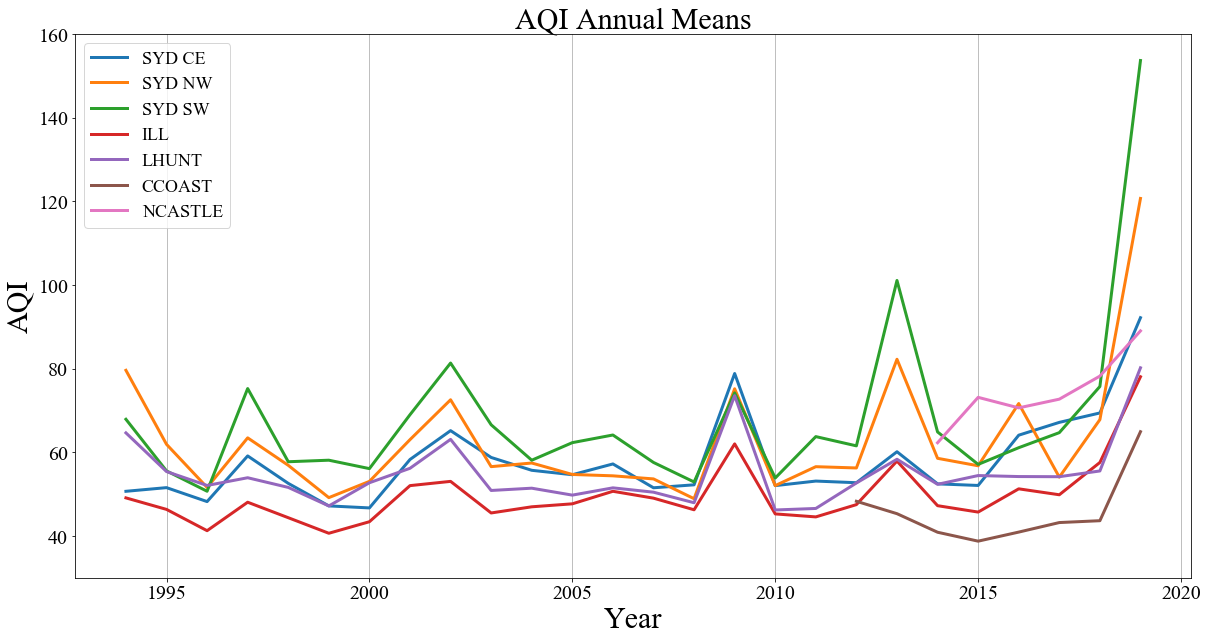

In [21]:
%matplotlib inline
# %matplotlib qt

fig= plt.figure(figsize=(20,10))

plt.plot(range(1994,2020),annual_SYD_CE,label='SYD CE',linewidth=3)
plt.plot(range(1994,2020),annual_SYD_NW,label='SYD NW',linewidth=3)
plt.plot(range(1994,2020),annual_SYD_SW,label='SYD SW',linewidth=3)
plt.plot(range(1994,2020),annual_ILL,label='ILL',linewidth=3)
plt.plot(range(1994,2020),annual_LHUNT,label='LHUNT',linewidth=3)
plt.plot(range(1994,2020),annual_CCOAST,label='CCOAST',linewidth=3)
plt.plot(range(1994,2020),annual_NCASTLE,label='NCASTLE',linewidth=3)
# PORTMAC & COFFS not plotted because not enough data
# plt.plot(range(1994,2020),annual_PORTMAC,label='PORTMAC',linewidth=3)
# plt.plot(range(1994,2020),annual_COFFS,label='COFFS',linewidth=3)

plt.legend(loc='upper left',fontsize=18)

plt.xlabel('Year',fontsize=30)
plt.ylabel('AQI',fontsize=30)
plt.title('AQI Annual Means',fontsize=30)
axes = plt.gca()
axes.set_ylim([30,160])
axes.grid(axis='x')
axes.tick_params(axis="x", labelsize=20)
axes.tick_params(axis="y", labelsize=20)
plt.rc('font', **font)
plt.show()

# removing unwanted variables
del fig, axes

<img src="SOI.png" width=500/>
<img src="SAM.png" width=500/>

<font size="4">
<br>    
Lets have a look at AQI levels in Sydney with more detail: 
<br>  

In [26]:
# For plotting AQI levels of health concern
# Create vertical lines representing each AQI advice level
yline = list(range(0,10000))
# health concern levels
moderate = [50] * 10000
unhealthy_sens= [100] * 10000 # 10000 chosen to be higher than any max val
unhealthy = [150] * 10000
vunhealthy = [200] * 10000
hazardous = [300] * 10000

#axvline is better for this!

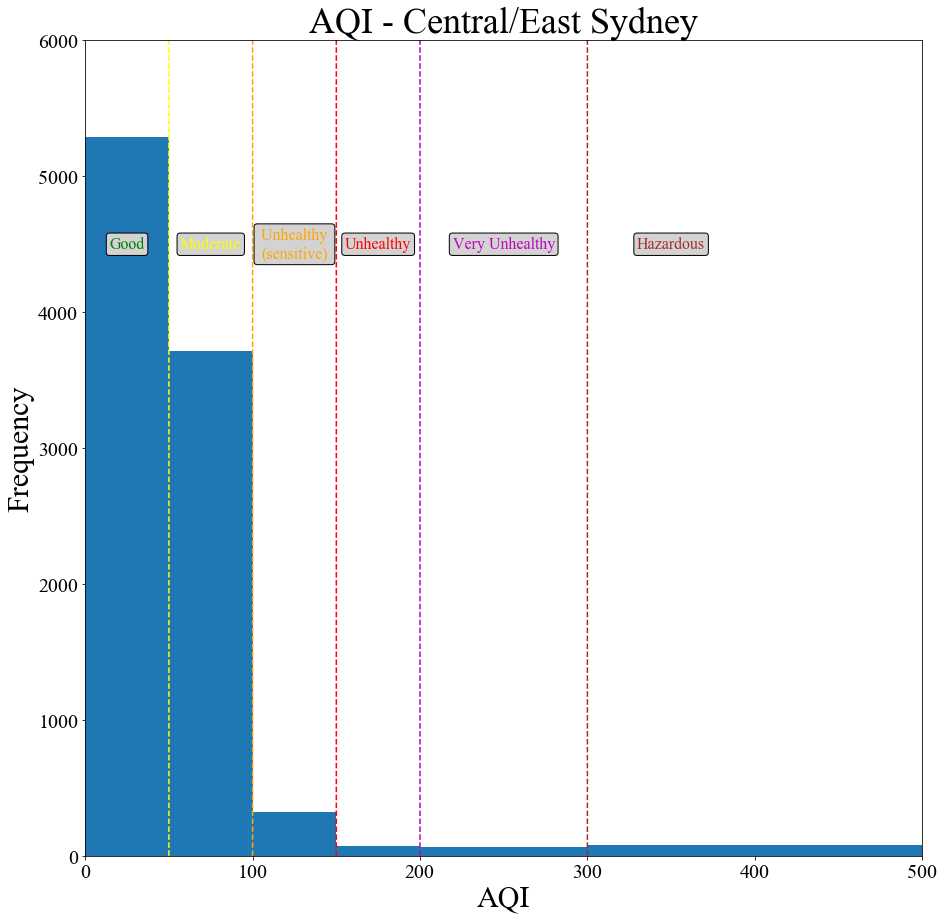

In [23]:
%matplotlib inline
# %matplotlib qt

# Plot histogram of the data   
fig= plt.figure(figsize=(15,15))
counts, bins, bars = plt.hist(SYD_CE,bins=[0,50,100,150,200,300,1000])
plt.xlim([0, 500])
plt.ylim([0,6000])
plt.plot(moderate,yline,color='yellow',linestyle='--')
plt.plot(unhealthy_sens,yline,color='orange',linestyle='--')
plt.plot(unhealthy,yline,color='red',linestyle='--')
plt.plot(vunhealthy,yline,color='m',linestyle='--')
plt.plot(hazardous,yline,color='brown',linestyle='--')
# Add annotations
plt.text(25, 4500, r'Good',
         {'color': 'green', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(75, 4500, r'Moderate',
         {'color': 'yellow', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(125, 4500, ' Unhealthy \n(sensitive)',
         {'color': 'orange', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(175, 4500, r'Unhealthy',
         {'color': 'red', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(250, 4500, r'Very Unhealthy',
         {'color': 'm', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(350, 4500, r'Hazardous',
         {'color': 'brown', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
# NOTE: r before string represents raw string (useful for avoiding latex sequences)

plt.rc('font', **font)
axes = plt.gca()
axes.tick_params(axis="x", labelsize=20)
axes.tick_params(axis="y", labelsize=20)

plt.xlabel('AQI', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.title('AQI - Central/East Sydney')

# bring it together
plt.show()

# removing unwanted variables
del fig, axes, bars, bins,

<font size="4">
<br>    
Which site is most unhealthy?
<br>  

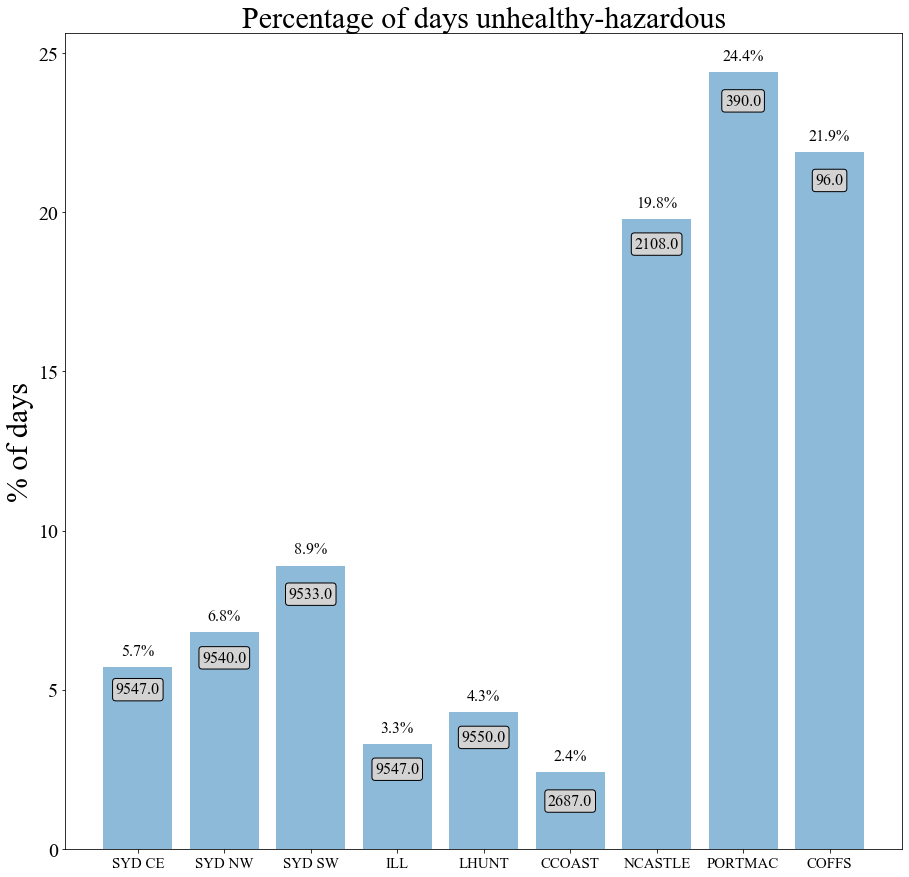

In [27]:
#seaborn is nicer for histograms!

%matplotlib inline
# %matplotlib qt
#----------------------------------------------------------------------------------
# get counts for each site
counts_SYD_CE, bins, bar = plt.hist(SYD_CE,bins=[0,50,100,150,200,300,1000])
counts_SYD_NW, bins, bar = plt.hist(SYD_NW,bins=[0,50,100,150,200,300,1000])
counts_SYD_SW, bins, bar = plt.hist(SYD_SW,bins=[0,50,100,150,200,300,1000])
counts_ILL, bins, bar = plt.hist(ILL,bins=[0,50,100,150,200,300,1000])
counts_LHUNT, bins, bar = plt.hist(LHUNT,bins=[0,50,100,150,200,300,1000])
counts_CCOAST, bins, bar = plt.hist(CCOAST,bins=[0,50,100,150,200,300,1000])
counts_NCASTLE, bins, bar = plt.hist(NCASTLE,bins=[0,50,100,150,200,300,1000])
counts_PORTMAC, bins, bar = plt.hist(PORTMAC,bins=[0,50,100,150,200,300,1000])
counts_COFFS, bins, bar = plt.hist(COFFS,bins=[0,50,100,150,200,300,1000])
plt.close("all")
#----------------------------------------------------------------------------------
# How many days of observations at each site?
TP_SYD_CE = np.sum(counts_SYD_CE) - np.sum(np.isnan(counts_SYD_CE))
TP_SYD_NW = np.sum(counts_SYD_NW) - np.sum(np.isnan(counts_SYD_NW))
TP_SYD_SW = np.sum(counts_SYD_SW) - np.sum(np.isnan(counts_SYD_SW))
TP_ILL = np.sum(counts_ILL) - np.sum(np.isnan(counts_ILL))
TP_LHUNT = np.sum(counts_LHUNT) - np.sum(np.isnan(counts_LHUNT))
TP_CCOAST = np.sum(counts_CCOAST) - np.sum(np.isnan(counts_CCOAST))
TP_NCASTLE = np.sum(counts_NCASTLE) - np.sum(np.isnan(counts_NCASTLE))
TP_PORTMAC = np.sum(counts_PORTMAC) - np.sum(np.isnan(counts_PORTMAC))
TP_COFFS = np.sum(counts_COFFS) - np.sum(np.isnan(counts_COFFS))
#----------------------------------------------------------------------------------
# calculate percentage of unhealthy-hazardous (AQI > 100) days per site 
counts_SYD_CE = round(np.sum(counts_SYD_CE[2:])/np.sum(counts_SYD_CE)*100,1)
counts_SYD_NW = round(np.sum(counts_SYD_NW[2:])/np.sum(counts_SYD_NW)*100,1)
counts_SYD_SW = round(np.sum(counts_SYD_SW[2:])/np.sum(counts_SYD_SW)*100,1)
counts_ILL = round(np.sum(counts_ILL[2:])/np.sum(counts_ILL)*100,1)
counts_LHUNT = round(np.sum(counts_LHUNT[2:])/np.sum(counts_LHUNT)*100,1)
counts_CCOAST = round(np.sum(counts_CCOAST[2:])/np.sum(counts_CCOAST)*100,1)
counts_NCASTLE = round(np.sum(counts_NCASTLE[2:])/np.sum(counts_NCASTLE)*100,1)
counts_PORTMAC = round(np.sum(counts_PORTMAC[2:])/np.sum(counts_PORTMAC)*100,1)
counts_COFFS = round(np.sum(counts_COFFS[2:])/np.sum(counts_COFFS)*100,1)
#----------------------------------------------------------------------------------
# prepare for bar chart
counts_list = [counts_SYD_CE,counts_SYD_NW,counts_SYD_SW,counts_ILL,counts_LHUNT,
               counts_CCOAST,counts_NCASTLE,counts_PORTMAC,counts_COFFS]
objects = ('SYD CE', 'SYD NW', 'SYD SW', 'ILL', 'LHUNT', 'CCOAST','NCASTLE','PORTMAC','COFFS')
y_pos = np.arange(len(objects))
#----------------------------------------------------------------------------------
#create bar chart of unhealthy-hazardous sites
fig= plt.figure(figsize=(15,15))
plt.bar(y_pos, counts_list, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('% of days',fontsize=30)
plt.title('Percentage of days unhealthy-hazardous',fontsize=30)
axes = plt.gca()
axes.tick_params(axis="x", labelsize=15)
axes.tick_params(axis="y", labelsize=20)
# Add percentages as annotations
plt.text(0, counts_SYD_CE+0.5, str(counts_SYD_CE) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})
plt.text(1, counts_SYD_NW+0.5, str(counts_SYD_NW) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})
plt.text(2, counts_SYD_SW+0.5, str(counts_SYD_SW) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})
plt.text(3, counts_ILL+0.5, str(counts_ILL) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})
plt.text(4, counts_LHUNT+0.5, str(counts_LHUNT) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})
plt.text(5, counts_CCOAST+0.5, str(counts_CCOAST) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})
plt.text(6, counts_NCASTLE+0.5, str(counts_NCASTLE) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})
plt.text(7, counts_PORTMAC+0.5, str(counts_PORTMAC) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})
plt.text(8, counts_COFFS+0.5, str(counts_COFFS) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})

# Add annotations of time period length
plt.text(0, 5, str(TP_SYD_CE),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(1, 6, str(TP_SYD_NW),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(2, 8, str(TP_SYD_SW),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(3, 2.5, str(TP_ILL),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(4, 3.5, str(TP_LHUNT),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(5, 1.5, str(TP_CCOAST),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(6, 19, str(TP_NCASTLE),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(7, 23.5, str(TP_PORTMAC),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(8, 21, str(TP_COFFS),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})

# removing unwanted variables
del fig, axes, y_pos, objects, counts_list

<font size="4">
<br>    
Displaying statistics:
<br>  

In [28]:
#----------------------------------------------------------------------------------
# percentage of data 
total_counts = np.nansum(counts)
percentages = (counts/total_counts)*100
print('Central / East Sydney air quality conditions between 1994 and 2020:')
print('                                                                   ')
print('-------------------------------------------------------------------')
print('                                                                   ')
print(str(round(percentages[0],1)) + '% of days were ''good''')
print(str(round(percentages[1],1)) + '% of days were ''moderate''')
print(str(round(percentages[2],1)) + '% of days were ''unhealthy for sensitive groups''')
print(str(round(percentages[3],1)) + '% of days were ''unhealthy''')
print(str(round(percentages[4],1)) + '% of days were ''very unhealthy''')
print(str(round(percentages[5],1)) + '% of days were ''hazardous''')
print('                                                                   ')
print('-------------------------------------------------------------------')
print('                                                                   ')
print(str(round((round(np.nansum(percentages[2:5]))/100)*total_counts)) + ' days were unhealthy-hazardous')
#----------------------------------------------------------------------------------
# Top twenty worst days
max_vals_index = np.argsort(SYD_CE)
max_vals = np.array(SYD_CE)
max_vals[::-1].sort()
# I could not apply max_vals_index as indices for element selection, so done manually :-/
max_vals_days = [time[5744],time[9473],time[9454],time[9452],time[8161],time[7244],time[5733],
                 time[9468],time[9467],time[9482],time[8984],time[7232],time[5723],time[8323],
                 time[8456],time[8985],time[9271],time[5740],time[6820],time[9466]] 

print('                                                                   ')
print('-------------------------------------------------------------------')
print('                                                                   ')
print('Top 20 Worst days:')
print('                                                                   ')
for x in range(0,len(max_vals_days)):
    time_info = str(max_vals_days[x])
    print('(' + str(x+1) + ')  ' + time_info[0:10] + '   |  AQI =  ' + str(max_vals[x+2]))
    
#----------------------------------------------------------------------------------
print('                                                                   ')
print('All top 20 worst days in last ~10 years')
print('Worst day on September 23 2009')
print('8/20 worst days in 2019')
print('16/20 fire season days (Sept - March)')
print('(20) was 2009 Australian dust storm:')

Central / East Sydney air quality conditions between 1994 and 2020:
                                                                   
-------------------------------------------------------------------
                                                                   
55.4% of days were good
38.9% of days were moderate
3.4% of days were unhealthy for sensitive groups
0.8% of days were unhealthy
0.7% of days were very unhealthy
0.9% of days were hazardous
                                                                   
-------------------------------------------------------------------
                                                                   
477.0 days were unhealthy-hazardous
                                                                   
-------------------------------------------------------------------
                                                                   
Top 20 Worst days:
                                                                   
(1)  20

<img src="dust_sat.jpg" />
<img src="Red-Dust.jpg" />
<img src="dust_Map.png" />

Pictures taken from Wikipedia (https://en.wikipedia.org/wiki/2009_Australian_dust_storm)

<font size="4">
<br>    
Comparing Sydney with other sites (Delhi, Beijing, London):
<br>  


https://aqicn.org/data-platform/register/

In [29]:
# Load in Delhi AQI daily averaged data
AQI = pd.read_csv('/Users/Michael/Documents/Work/UNSW/Python/PUG_02032020/beijing-air-quality.csv')
#-----------------------------------------------------------------------------
# select series from dataframe
BEIJ_date = AQI["date"]
BEIJ_PM25 = AQI[" pm25"]
#-----------------------------------------------------------------------------
# Load in Delhi AQI daily averaged data
AQI = pd.read_csv('/Users/Michael/Documents/Work/UNSW/Python/PUG_02032020/new-delhi us embassy, india-air-quality.csv')
#-----------------------------------------------------------------------------
# select series from dataframe
DELH_date = AQI["date"]
DELH_PM25 = AQI[" pm25"]
#-----------------------------------------------------------------------------
# Load in London AQI daily averaged data
AQI = pd.read_csv('/Users/Michael/Documents/Work/UNSW/Python/PUG_02032020/london-air-quality.csv')
#-----------------------------------------------------------------------------
# select series from dataframe
LOND_date = AQI["date"]
LOND_PM25 = AQI[" pm25"]

In [30]:
# Get counts for each site
counts_BEIJ, bins, bar = plt.hist(BEIJ_PM25,bins=[0,50,100,150,200,300,1000])
counts_DELH, bins, bar = plt.hist(DELH_PM25,bins=[0,50,100,150,200,300,1000])
counts_LOND, bins, bar = plt.hist(LOND_PM25,bins=[0,50,100,150,200,300,1000])
plt.close('all')
# How many days of observations at each site?
TP_BEIJ = np.sum(counts_BEIJ) - np.sum(np.isnan(counts_BEIJ))
TP_DELH = np.sum(counts_DELH) - np.sum(np.isnan(counts_DELH))
TP_LOND = np.sum(counts_LOND) - np.sum(np.isnan(counts_LOND))
#----------------------------------------------------------------------------------
# calculate percentage of unhealthy-hazardous (AQI > 100) days per site 
counts_BEIJ = round(np.sum(counts_BEIJ[2:])/np.sum(counts_BEIJ)*100,1)
counts_DELH = round(np.sum(counts_DELH[2:])/np.sum(counts_DELH)*100,1)
counts_LOND = round(np.sum(counts_LOND[2:])/np.sum(counts_LOND)*100,1)

# fix bug for LOND
counts_LOND, bins, bar = plt.hist(LOND_PM25,bins=[0,50,100,150,200,300,1000])
counts_LOND = round(np.sum(counts_LOND[2:])/np.sum(counts_LOND)*100,1)
plt.close('all')

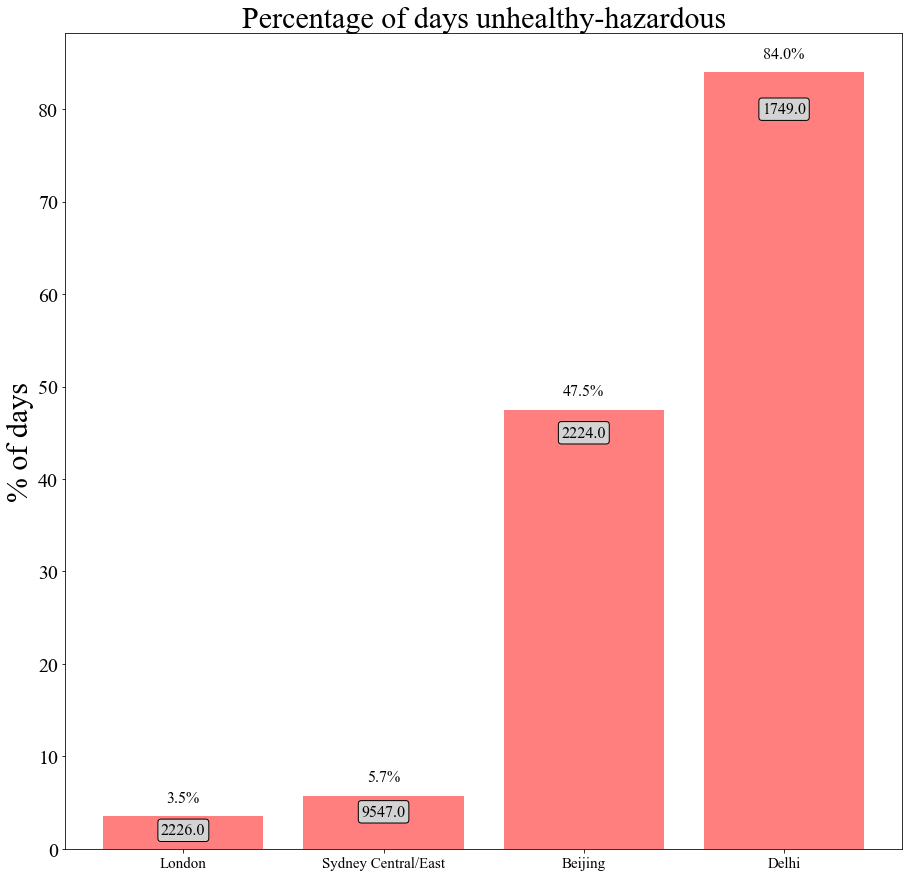

In [31]:
# prepare for bar chart
counts_list = [counts_LOND,counts_SYD_CE,counts_BEIJ,counts_DELH]
objects = ('London','Sydney Central/East','Beijing','Delhi')
y_pos = np.arange(len(objects))
#----------------------------------------------------------------------------------
#create bar chart of unhealthy-hazardous sites
fig= plt.figure(figsize=(15,15))
plt.bar(y_pos, counts_list, align='center', alpha=0.5,color='red')
plt.xticks(y_pos, objects)
plt.ylabel('% of days',fontsize=30)
plt.title('Percentage of days unhealthy-hazardous',fontsize=30)
axes = plt.gca()
axes.tick_params(axis="x", labelsize=15)
axes.tick_params(axis="y", labelsize=20)
# Add percentages as annotations
plt.text(0, counts_LOND+2, str(counts_LOND) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})
plt.text(1, counts_SYD_CE+2, str(counts_SYD_CE) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})
plt.text(2, counts_BEIJ+2, str(counts_BEIJ) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})
plt.text(3, counts_DELH+2, str(counts_DELH) + '%',
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center'})


# Add annotations of time period length
plt.text(0, 2, str(TP_LOND),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(1, 4, str(TP_SYD_CE),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(2, 45, str(TP_BEIJ),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})
plt.text(3, 80, str(TP_DELH),
         {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="lightgray", ec="black", pad=0.2)})

# removing unwanted variables
del fig, axes, y_pos, objects, counts_list

## Lessons learnt:

* Reading a .csv file with more than three lines of strings causes an index error (e.g. when plotting) (skip pandas)
* Plotting Date vs. AQI variable took a long time to master. I think was counted as a string series.. I needed to create a datetime variable.
* To save a value to a list per iteration in a for loop, use <list_name>.apppend
* Can obtain year, month, day etc. and also day of the year using datetime
* It was a mistake not importing/ converting all data to the same structure (e.g. pandas or xarray).

## Suggestions on how to improve the code?

*